# Image Pipeline

In [135]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

In [136]:
img=cv2.imread('C:/Users/Vamsi/Desktop/Image processing/opencv_project/studysession/rachel.jpg',1)

In [137]:
def bgr_to_rgb(img):
    img_rgb=copy.deepcopy(img)

    h=img.shape[0]
    w=img.shape[1]
    d=img.shape[2]

    for y in range(0,h):
        for x in range(0,w):
            r=img[y][x][2]
            g=img[y][x][1]
            b=img[y][x][0]
            img_rgb[y][x][0]=r
            img_rgb[y][x][1]=g
            img_rgb[y][x][2]=b

    # plt.imshow(np.concatenate((img,img_rgb),axis=1))  
    return copy.deepcopy(img_rgb)
    # plt.imshow(img)

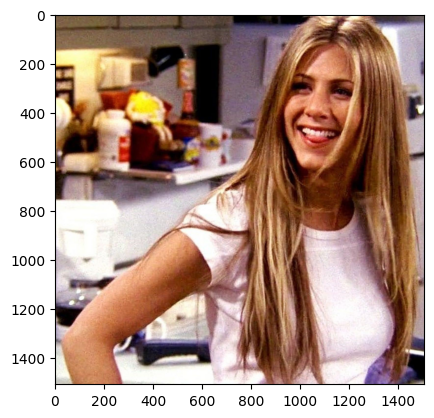

In [138]:


# img_n=cv2.imread("rachel_200 size.png")

# print(img_n.shape)

# img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=bgr_to_rgb(img)
plt.imshow(img)

# print(img)



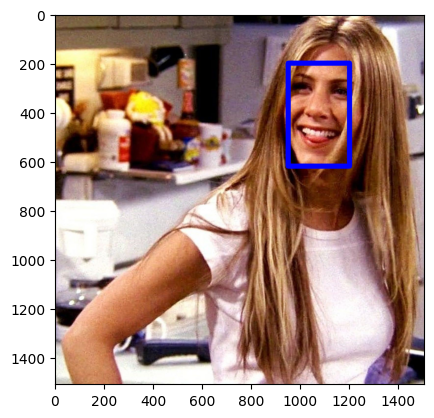

In [139]:
# convert back to BGR

img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

top_left=(950,200)

bottom_right=(1200,620)

rect_color=(255,0,0)

thickness=20

img_rect=cv2.rectangle(img,top_left,bottom_right,rect_color,thickness)

img_rect=bgr_to_rgb(img_rect)

plt.imshow(img_rect)



(1509, 1508)


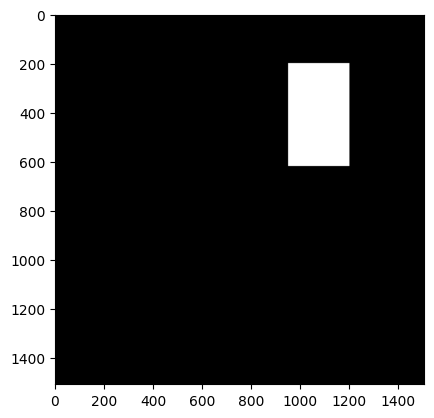

In [140]:
# create a black mask

mask=np.zeros(img.shape[:2],np.uint8)
print(mask.shape)

# Add a white portion on the mask

mask[200:620,950:1200]=255

plt.imshow(mask,cmap="gray")



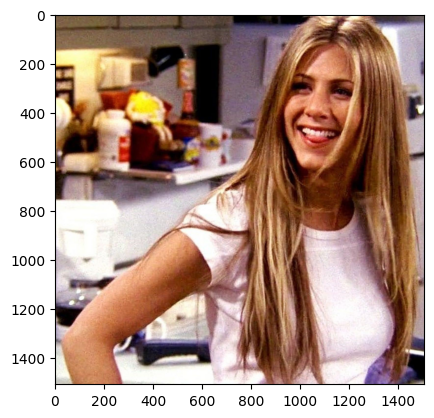

In [141]:
img=cv2.imread("rachel.jpg")

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [142]:


def rgb_to_hsv(rgb):
    # Input: rgb is an 3-D array [r,g,b] with values in range [0,255]. 
    # r = rgb[0][0][0], b = rgb[0][0][1], g = rgb[0][0][2]
    # Output: hsv is an 3-D array [h,s,v] with values in range h = [0,180], s = [0,255], v = [0,255].

    # Normalize color values.  Convert to floating point values between 0 - 1
    rgb = rgb/255

    # Initialize HSV
    h = 0.0
    s = 0.0
    v = 0.0

    # Find the max and min RGB values. 
    v = np.max(rgb)
    vMin = np.min(rgb)

    # Set the saturation value.
    if(v>0.0):
        s = (v - vMin)/v
    else:
        s = 0.0

    # Calculate (v - vMin) convenience
    diff = (v - vMin)

    # Compute the hue by the relative sizes of the RGB components

    # Are r,g,b equal. 
    if(rgb[0] == rgb[1] and rgb[1] == rgb[2]):
        h = 0
    # Is the point within +/- 60 degrees of the red axis
    elif(rgb[0] == v):
        h = 60 * (rgb[1] - rgb[2]) / diff
    # Is the point within +/- 60 degrees of the green axis
    elif(rgb[1] == v):
        h = 120 + 60 * (rgb[2] - rgb[0]) / diff
    # IS the point within +/- 60 degrees of the blue axis
    elif(rgb[2] == v):
        h = 240 + 60 * (rgb[0] - rgb[1]) / diff

    # print("h before interp",h)
    # print("s before interp",s)
    # print("v before interp",v)
  
  # interp function is used to convert the value of one range to other range 
    
    s = round(np.interp(s,[0,1],[0,255]))
    v = round(np.interp(v,[0,1],[0,255]))
    h=round(h/2)
    

    # Return hsv values.
    return np.array([h,s,v])

# Create a rgb value.
#rgb = np.array([200,74,55])

# Call the rgb_to_hsv function.  
#hsv = rgb_to_hsv(rgb)

#print("The original rgb value:", rgb)
#print("Converted to hsv:", hsv)


   

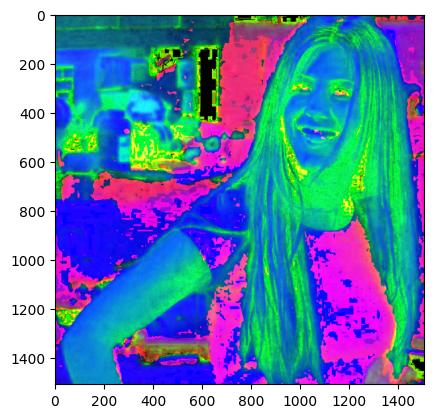

In [143]:
def RGB_TO_HSV(img):
    img_hsv=copy.deepcopy(img)
    h=img.shape[0]
    w=img.shape[1]
    d=img.shape[2]

    for y in range(0,h):
        for x in range(0,w):
            img_hsv[y][x]=rgb_to_hsv(img[y][x])

    return copy.deepcopy(img_hsv)


# RGB_TO_HSV(Image)
img = RGB_TO_HSV(img)

plt.imshow(img)

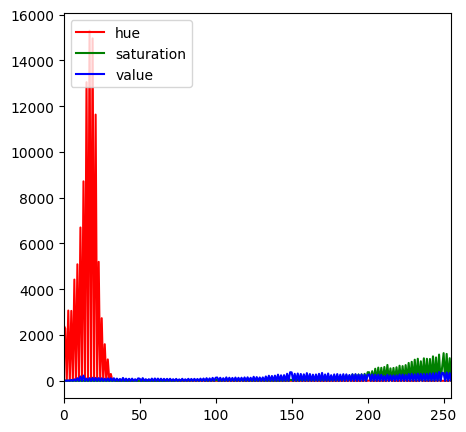

In [144]:
fig = plt.figure(figsize=(5,5))
# Plot the hue.
hist = cv2.calcHist([img],[0],mask,[500],[0,255])
plt.plot(hist, color="red")
plt.xlim([0,255])
# Plot the saturation
hist = cv2.calcHist([img],[1],mask,[500],[0,255])
plt.plot(hist, color="green")
plt.xlim([0,255])
# Plot the value
hist = cv2.calcHist([img],[2],mask,[500],[0,255])
plt.plot(hist, color="blue")
plt.xlim([0,255])
plt.legend(('hue', 'saturation', 'value'), loc = 'upper left')
plt.show()

In [145]:
#The hsv values are mapped in the range of 0-1 from 0-255
def hsv_to_rgb(hsv):
    h=hsv[0]*2
    s=(np.interp(hsv[1],[0,255],[0,1]))
    v=(np.interp(hsv[2],[0,255],[0,1]))


    c=v*s

    x=c*(1-np.absolute((h/60)%2-1))

    # print("x is",x)

    m=v-c

    r1=0
    g1=0
    b1=0

    # Is the point within 0 to 60 degrees of the red axis
    if(h>=0 and h<60):
        r1=c
        g1=x
        b1=0
        # Is the point within  0 to -60 degrees of the green  axis
    elif(h>=60 and h<120):
        r1=x
        g1=c
        b1=0
        # Is the point within  0 to 60 degrees of the green axis
    elif(h>=120 and h<180):
        r1=0
        g1=c
        b1=x
        # Is the point within  0 to -60 degrees of the blue axis
    elif(h>=180 and h<240):
        r1=0
        g1=x
        b1=c
        # Is the point within  0 to 60 degrees of the blue axis
    elif(h>=240 and h<300):
        r1=x
        g1=0
        b1=c
        # Is the point within - 60 degrees of the red axis
    elif(h>=300 and h<360):
        r1=x
        g1=c
        b1=0

    r=(r1+m)*255
    g=(g1+m)*255
    b=(b1+m)*255

    # Creating and printing the array with RGB values in it.
    rgb=np.array([r,g,b])
    return rgb






In [146]:
def HSV_TO_RGB(img):
    img_rgb=copy.deepcopy(img)
    h=img.shape[0]
    w=img.shape[1]
    d=img.shape[2]

    for y in range(0,h):
        for x in range(0,w):
            img_rgb[y][x]=hsv_to_rgb(img[y][x])

    return copy.deepcopy(img_rgb)


# RGB_TO_HSV(Image)
# img = HSV_TO_RGB(img)

# plt.imshow(img)

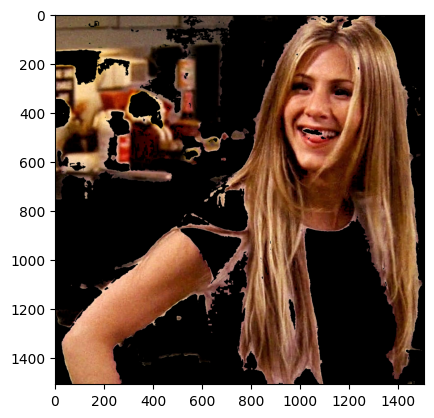

In [148]:
min_HSV=np.array([0,70,0],np.uint8)
max_HSV=np.array([20,255,255],np.uint8)

skinArea=cv2.inRange(img,min_HSV,max_HSV)

skinHSV = cv2.bitwise_and(img,img,mask=skinArea)
# skinHSV = cv2.cvtColor(skinHSV, cv2.COLOR_HSV2RGB)
# plt.imshow(skinHSV)
skinHSV=HSV_TO_RGB(skinHSV)

plt.imshow(skinHSV)